# Vizualize for illustrations

Create some illustrative non-analytical plots for the bachalors project

## Zipf's law for the Netherlands ans for UK as opposites

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

In [17]:
medium_font = fm.FontProperties(fname = 'Roboto-Medium.ttf', size = 12)
regluar_font = fm.FontProperties(fname = 'Roboto-Regular.ttf', size = 12)

colors = {
    'peach' : '#FCB886',
    'blue' : '#6FC7F7',
    'green' : '#78AF34',
    'red' : '#D25B5B',
    'grey' : '#8B8B8B'
}

In [3]:
import requests 
from bs4 import BeautifulSoup as soup

In [4]:
page_soup = soup(requests.get('https://en.wikipedia.org/wiki/List_of_urban_areas_in_the_United_Kingdom').text)
table = page_soup.find('table', {'class' : 'wikitable sortable'})

In [5]:
uk_cities = []
for row in table.find_all('tr')[1:]:
    cells = row.find_all('td')
    name = cells[0].text.lower().replace('\n', '').replace(' built-up area', '').title()
    population = int(cells[1].text.replace(',', '').replace('\n', '').split('[')[0])
    uk_cities.append([name, population])
    
uk_cities = pd.DataFrame(uk_cities, columns = ['city', 'population'])

In [6]:
page_soup = soup(requests.get('https://population.mongabay.com/population/netherlands').text)
table = page_soup.find('table', {'content' : 'List of the biggest cities in Netherlands'})

In [7]:
netherlands_table = []
for row in table.find_all('tr')[1:]:
    name = row.find('span', {'itemprop' : 'name'}).text
    population = int(row.find('td', {'class' : 'r'}).text.strip().replace(',', ''))
    netherlands_table.append([name, population])
    
netherlands_table = pd.DataFrame(netherlands_table, columns = ['city', 'population'])

In [8]:
uk_cities.iloc[0, -1]

9787426

In [9]:
def modify(df):
    df['rank'] = [i for i in range(1, len(df) + 1)]
    df['norm_pop'] = df['population'] / df.population.max()
    return(df)

uk_cities = modify(uk_cities)
netherlands_table = modify(netherlands_table)

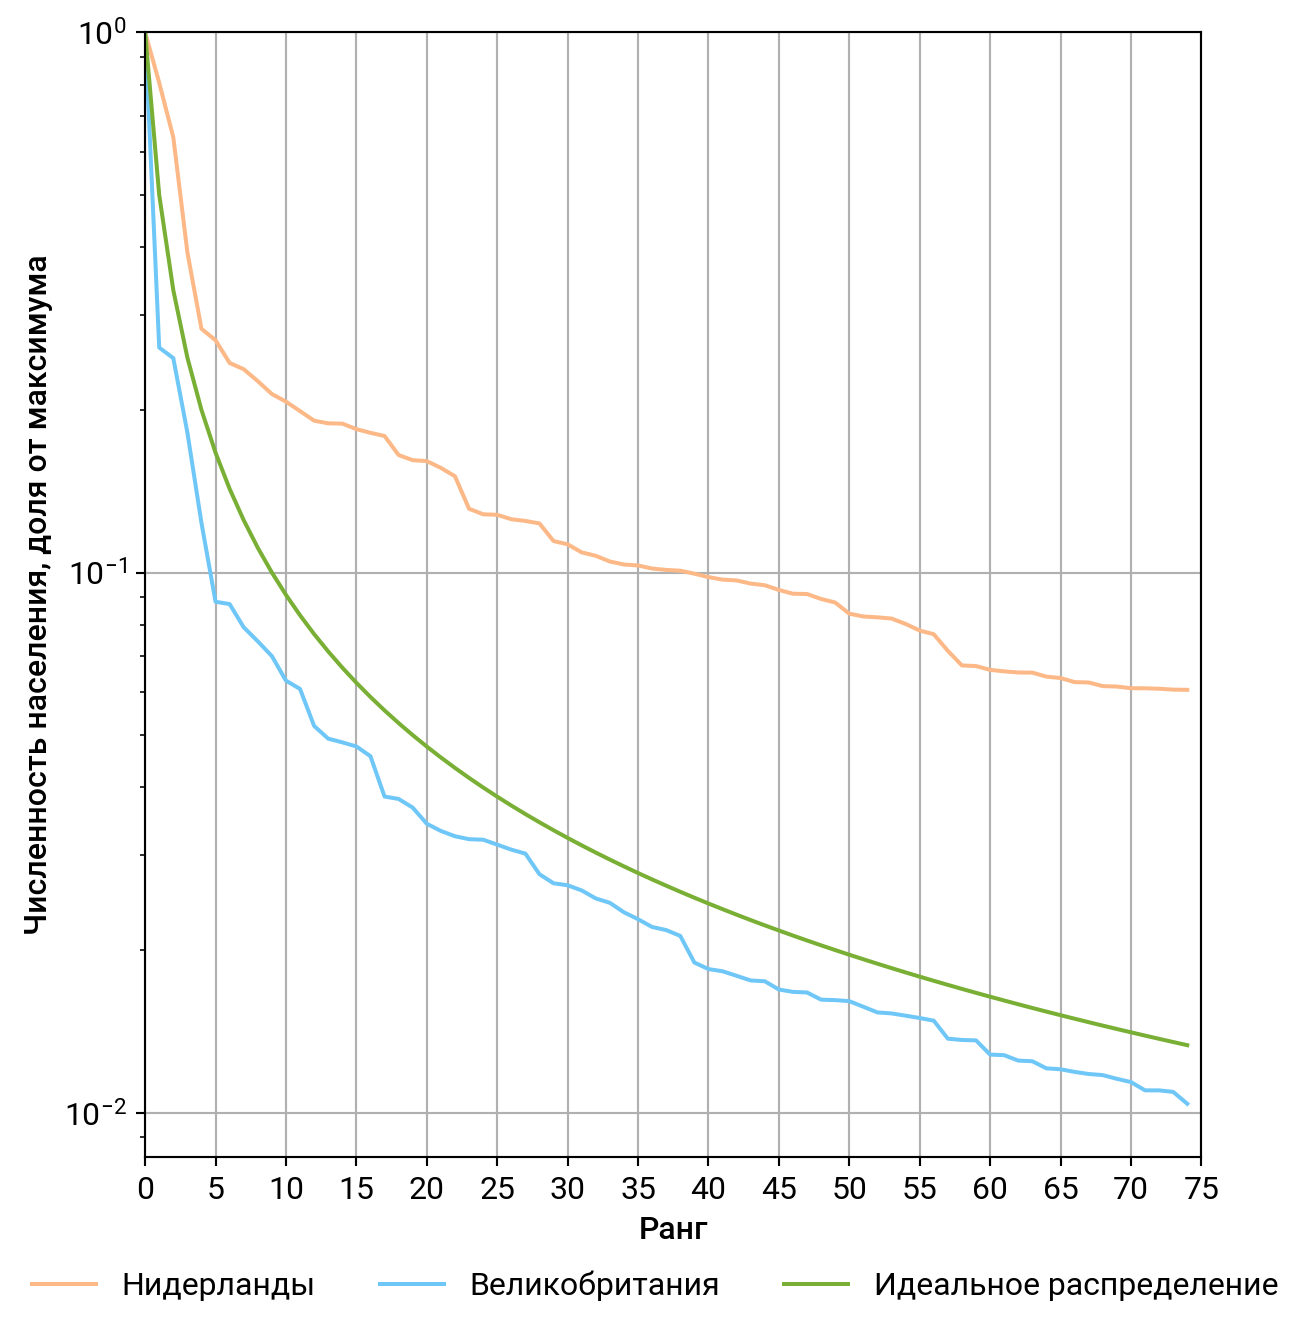

In [29]:
plt.figure(figsize = (7,7), dpi = 192)
netherlands_table[:75].norm_pop.plot(label = 'Нидерланды', color = colors['peach'])
uk_cities.norm_pop.plot(label = 'Великобритания', color = colors['blue'])
plt.plot([1/i for i in range(1, 76)], label = 'Идеальное распределение', color = colors['green'])
plt.yscale('log')
plt.xticks([i for i in range(0, 76, 5)], [i for i in range(0, 76, 5)], fontproperties = regluar_font, fontsize = 12)
plt.yticks(fontproperties = regluar_font, fontsize = 12)

plt.xlabel('Ранг', fontproperties = medium_font, fontsize = 12)
plt.ylabel('Численность населения, доля от максимума', fontproperties = medium_font, fontsize = 12)
plt.ylim(top = 1)
plt.grid()
# plt.title('Нидерланды', fontproperties = medium_font, fontsize = 16)

plt.legend(prop = regluar_font, frameon = False, bbox_to_anchor = (1.1,-0.075), ncol = 3)
plt.tight_layout()
plt.savefig('D:/bachelors/illustrations/01_ranksize_distribution_2.png')
# plt.legend()

In [35]:
import googletrans
import geocoder
from time import sleep
from tqdm import tqdm

In [31]:
netherlands_table['lat'], netherlands_table['lon'] = pd.Series(), pd.Series()

In [32]:
def gcode(location):
    """
    Sends request to geocoding server, returns tuple with coordinates
    """
    try:
        g = geocoder.arcgis(location).json
        return g['lat'], g['lng'], g
    except Exception as e:
        print(e)
        return None, None, g

In [33]:
netherlands_table['address'] = netherlands_table.city + ', Netherlands'

In [36]:
responses = []
for i, row in tqdm(netherlands_table.iterrows()):
    location = row['address']
    lat, lon, response = gcode(location)
    sleep(1)
    
    responses.append([location, response])
    
    netherlands_table.loc[netherlands_table.address == location, 'lat'] = lat
    netherlands_table.loc[netherlands_table.address == location, 'lon'] = lon


270it [07:05,  1.57s/it]Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


'NoneType' object is not subscriptable


1402it [36:54,  1.56s/it]


In [37]:
netherlands_table.to_csv('D:/bachelors/illustrations/map_cities.csv', index = None)

NameError: name 'medium_fontfont' is not defined

<Figure size 1152x768 with 0 Axes>

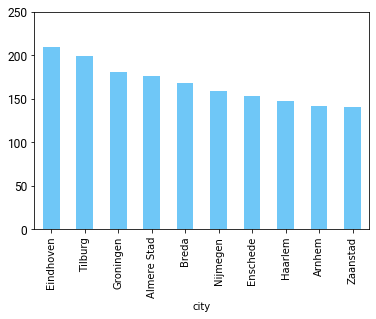

In [38]:
plt.figure(dpi = 192)
netherlands_table[4:14].plot.bar(x = 'city', y = 'population', color = colors['blue'], legend = False)
plt.yticks([i for i in range(0,260000, 50000)], [i for i in range(0,260, 50)], fontproperties = regluar_font)
plt.xticks([i for i in netherlands_table[4:14].city], netherlands_table[4:14], fontproperties = medium_fontfont)
plt.xlabel('')
plt.ylabel('Население, тыс. чел.', fontproperties = medium_font)


In [39]:
len(netherlands_table[4:][netherlands_table[4:]['population'] >= 150000])

7